In [48]:
# ===============================
# Phase 3 — User Clustering Analysis
# Cell 1: Load ML-ready user features from Phase 2
# ===============================

import pandas as pd
import numpy as np
from pathlib import Path

# ---------------- Paths (relative to notebook location) ----------------
# Try to detect project root - works if notebook is in notebooks/ subdirectory
current_dir = Path.cwd()
if current_dir.name == "notebooks":
    PROJECT_ROOT = current_dir.parent
elif (current_dir / "notebooks").exists():
    PROJECT_ROOT = current_dir
else:
    # Fallback: assume we're in project root
    PROJECT_ROOT = current_dir

DATA_PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"
FEATURE_FILE = DATA_PROCESSED_DIR / "features_user_ml.csv"

# Validate file exists
if not FEATURE_FILE.exists():
    raise FileNotFoundError(f"Feature file not found: {FEATURE_FILE}")

# ---------------- Load features ----------------
print(f"Loading features from: {FEATURE_FILE}")
user_features_ml = pd.read_csv(FEATURE_FILE)

# ---------------- Data validation ----------------
required_columns = ["user_id", "behavior_label"]
missing_cols = [col for col in required_columns if col not in user_features_ml.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# ---------------- Inspect data ----------------
print(f"\n{'='*60}")
print("DATA OVERVIEW")
print(f"{'='*60}")
print(f"Loaded feature matrix shape: {user_features_ml.shape}")
print(f"Number of users: {len(user_features_ml)}")
print(f"Number of features: {len(user_features_ml.columns) - 2}")  # Excluding user_id and behavior_label
print(f"\nColumns: {user_features_ml.columns.tolist()}")
print(f"\nMissing values per column:")
print(user_features_ml.isnull().sum())
print(f"\nSample data (first 5 rows):")
display(user_features_ml.head())

# ---------------- Prepare data for clustering ----------------
# Exclude user_id and behavior_label for unsupervised ML
feature_columns = [col for col in user_features_ml.columns 
                   if col not in ["user_id", "behavior_label"]]
X = user_features_ml[feature_columns].copy()
user_ids = user_features_ml["user_id"].copy()

# Check for any remaining missing values
if X.isnull().sum().sum() > 0:
    print(f"\nWARNING: Found {X.isnull().sum().sum()} missing values in features. Filling with median.")
    X = X.fillna(X.median())

print(f"\n{'='*60}")
print("FEATURE MATRIX READY FOR CLUSTERING")
print(f"{'='*60}")
print(f"Feature matrix shape: {X.shape}")
print(f"Feature names: {list(X.columns)}")


Loading features from: c:\Users\ASUS\Desktop\user_behavior_project\data\processed\features_user_ml.csv

DATA OVERVIEW
Loaded feature matrix shape: (5000, 30)
Number of users: 5000
Number of features: 28

Columns: ['avg_session_duration', 'avg_events_per_session', 'avg_pages_per_session', 'total_clicks', 'total_scrolls', 'total_add_to_cart', 'total_purchases', 'bounce_rate', 'std_session_duration', 'std_events_per_session', 'std_pages_per_session', 'total_page_views', 'total_cart_abandonments', 'conversion_rate', 'preferred_hour', 'weekend_session_ratio', 'total_sessions', 'sessions_per_day', 'avg_days_between_sessions', 'click_to_purchase_ratio', 'cart_to_purchase_ratio', 'cart_abandonment_rate', 'engagement_score', 'device_type_mobile', 'device_type_tablet', 'traffic_source_direct', 'traffic_source_organic', 'traffic_source_referral', 'user_id', 'behavior_label']

Missing values per column:
avg_session_duration         0
avg_events_per_session       0
avg_pages_per_session        0
to

,avg_session_duration,avg_events_per_session,avg_pages_per_session,total_clicks,total_scrolls,total_add_to_cart,total_purchases,bounce_rate,std_session_duration,std_events_per_session,...,cart_to_purchase_ratio,cart_abandonment_rate,engagement_score,device_type_mobile,device_type_tablet,traffic_source_direct,traffic_source_organic,traffic_source_referral,user_id,behavior_label
0,-0.369743,-0.005979,0.139124,-0.418231,-0.340704,0.487233,-0.425778,-0.2368,-0.444478,-0.181922,...,-0.391223,2.885430,-0.462398,1.0,0.0,1.0,0.0,0.0,U00001,buyer
1,0.990656,-1.223669,-0.533526,-0.062399,0.532784,-0.426215,-0.425778,-0.2368,-0.159390,-0.263716,...,-0.391223,-0.426031,1.045378,0.0,0.0,0.0,1.0,0.0,U00002,explorer
2,-1.009072,-0.361138,-1.273440,-0.774063,-0.340704,-0.426215,-0.425778,-0.2368,0.158816,-1.061250,...,-0.391223,-0.426031,-1.217058,1.0,0.0,1.0,0.0,0.0,U00003,scanner
3,-0.492354,-1.781777,-2.686004,-0.418231,-0.777448,-0.426215,-0.425778,-0.2368,0.329421,-1.677436,...,-0.391223,-0.426031,-0.900588,0.0,0.0,0.0,1.0,0.0,U00004,buyer
4,1.619558,-0.208927,0.273654,0.578099,0.096040,-0.426215,-0.425778,-0.2368,1.097876,0.448406,...,-0.391223,-0.426031,1.720825,0.0,0.0,0.0,1.0,0.0,U00005,explorer



FEATURE MATRIX READY FOR CLUSTERING
Feature matrix shape: (5000, 28)
Feature names: ['avg_session_duration', 'avg_events_per_session', 'avg_pages_per_session', 'total_clicks', 'total_scrolls', 'total_add_to_cart', 'total_purchases', 'bounce_rate', 'std_session_duration', 'std_events_per_session', 'std_pages_per_session', 'total_page_views', 'total_cart_abandonments', 'conversion_rate', 'preferred_hour', 'weekend_session_ratio', 'total_sessions', 'sessions_per_day', 'avg_days_between_sessions', 'click_to_purchase_ratio', 'cart_to_purchase_ratio', 'cart_abandonment_rate', 'engagement_score', 'device_type_mobile', 'device_type_tablet', 'traffic_source_direct', 'traffic_source_organic', 'traffic_source_referral']


Computing optimal k...
Testing k values from 2 to 10
  k=2: WCSS=120704.19, Silhouette=0.2170
  k=3: WCSS=108431.28, Silhouette=0.1388
  k=4: WCSS=100680.36, Silhouette=0.1473
  k=5: WCSS=95145.75, Silhouette=0.1540
  k=6: WCSS=90343.02, Silhouette=0.1285
  k=7: WCSS=85803.72, Silhouette=0.1670
  k=8: WCSS=82781.34, Silhouette=0.1404
  k=9: WCSS=79991.87, Silhouette=0.1118
  k=10: WCSS=77770.17, Silhouette=0.1117


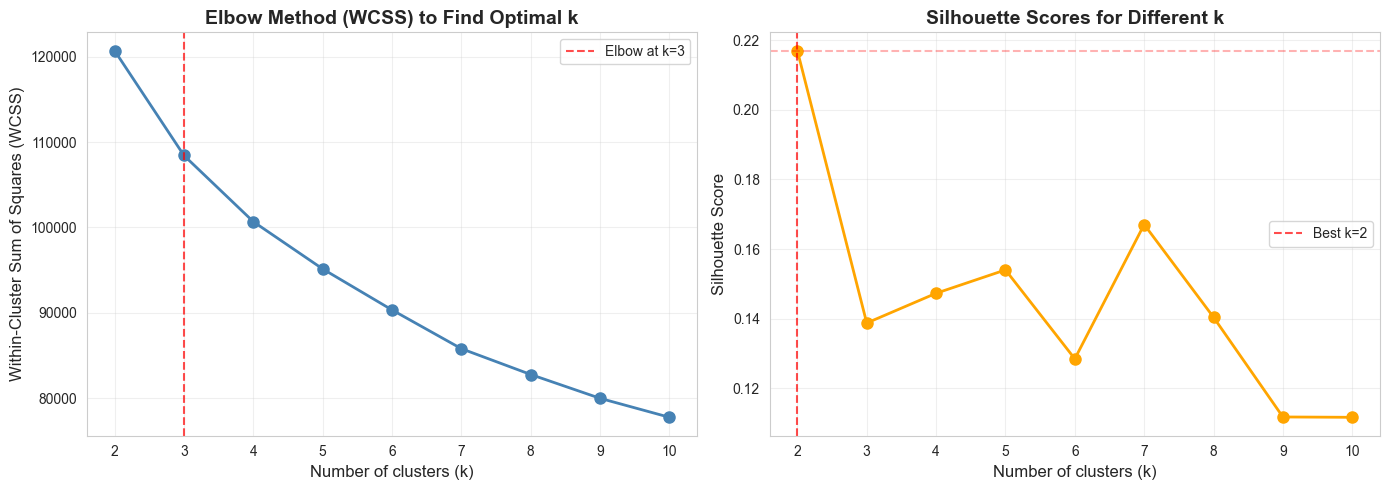


OPTIMAL K RECOMMENDATIONS
Best k by Silhouette Score: 2 (score: 0.2170)
Suggested k by Elbow Method: 3

Note: Silhouette score ranges from -1 to 1.
      Higher values indicate better-defined clusters.
      Values > 0.5 suggest reasonable clustering structure.



In [49]:
# ===============================
# Cell 2: Find Optimal Number of Clusters (K)
# Using Elbow Method and Silhouette Analysis
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# ---------------- Normalize features for better clustering ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- Range of k to try ----------------
k_range = range(2, 11)
wcss = []           # Within-cluster sum of squares (inertia)
sil_scores = []     # Silhouette scores

print("Computing optimal k...")
print(f"Testing k values from {min(k_range)} to {max(k_range)}")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X_scaled)
    
    # WCSS (inertia) - lower is better
    wcss.append(kmeans.inertia_)
    
    # Silhouette score - higher is better (range: -1 to 1)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"  k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette={sil:.4f}")

# ---------------- Find best k ----------------
best_k_silhouette = list(k_range)[np.argmax(sil_scores)]
best_silhouette_score = max(sil_scores)

# Elbow method: find the "elbow" point (knee point)
# Calculate rate of change in WCSS
wcss_diff = np.diff(wcss)
wcss_diff2 = np.diff(wcss_diff)
elbow_k = list(k_range)[np.argmax(wcss_diff2) + 1] if len(wcss_diff2) > 0 else best_k_silhouette

# ---------------- Plot results ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Elbow Method (WCSS)
axes[0].plot(k_range, wcss, marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].axvline(x=elbow_k, color='red', linestyle='--', alpha=0.7, label=f'Elbow at k={elbow_k}')
axes[0].set_title("Elbow Method (WCSS) to Find Optimal k", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Number of clusters (k)", fontsize=12)
axes[0].set_ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_xticks(list(k_range))

# Plot 2: Silhouette Scores
axes[1].plot(k_range, sil_scores, marker='o', linewidth=2, markersize=8, color='orange')
axes[1].axvline(x=best_k_silhouette, color='red', linestyle='--', alpha=0.7, 
                label=f'Best k={best_k_silhouette}')
axes[1].axhline(y=best_silhouette_score, color='red', linestyle='--', alpha=0.3)
axes[1].set_title("Silhouette Scores for Different k", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Number of clusters (k)", fontsize=12)
axes[1].set_ylabel("Silhouette Score", fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_xticks(list(k_range))

plt.tight_layout()
plt.show()

# ---------------- Print recommendations ----------------
print(f"\n{'='*60}")
print("OPTIMAL K RECOMMENDATIONS")
print(f"{'='*60}")
print(f"Best k by Silhouette Score: {best_k_silhouette} (score: {best_silhouette_score:.4f})")
print(f"Suggested k by Elbow Method: {elbow_k}")
print(f"\nNote: Silhouette score ranges from -1 to 1.")
print(f"      Higher values indicate better-defined clusters.")
print(f"      Values > 0.5 suggest reasonable clustering structure.")
print(f"{'='*60}\n")

# Store best k for next cell (will use silhouette-based recommendation)
optimal_k = best_k_silhouette


Using k=2 clusters for K-Means clustering

K-MEANS CLUSTERING RESULTS
Number of clusters: 2
Silhouette Score: 0.2170 (higher is better, range: -1 to 1)
Calinski-Harabasz Score: 798.98 (higher is better)
Davies-Bouldin Score: 2.0113 (lower is better)

Cluster size distribution:
  Cluster 0: 3953 users (79.06%)
  Cluster 1: 1047 users (20.94%)

PCA Explained Variance: PC1=15.88%, PC2=13.33%, Total=29.21%


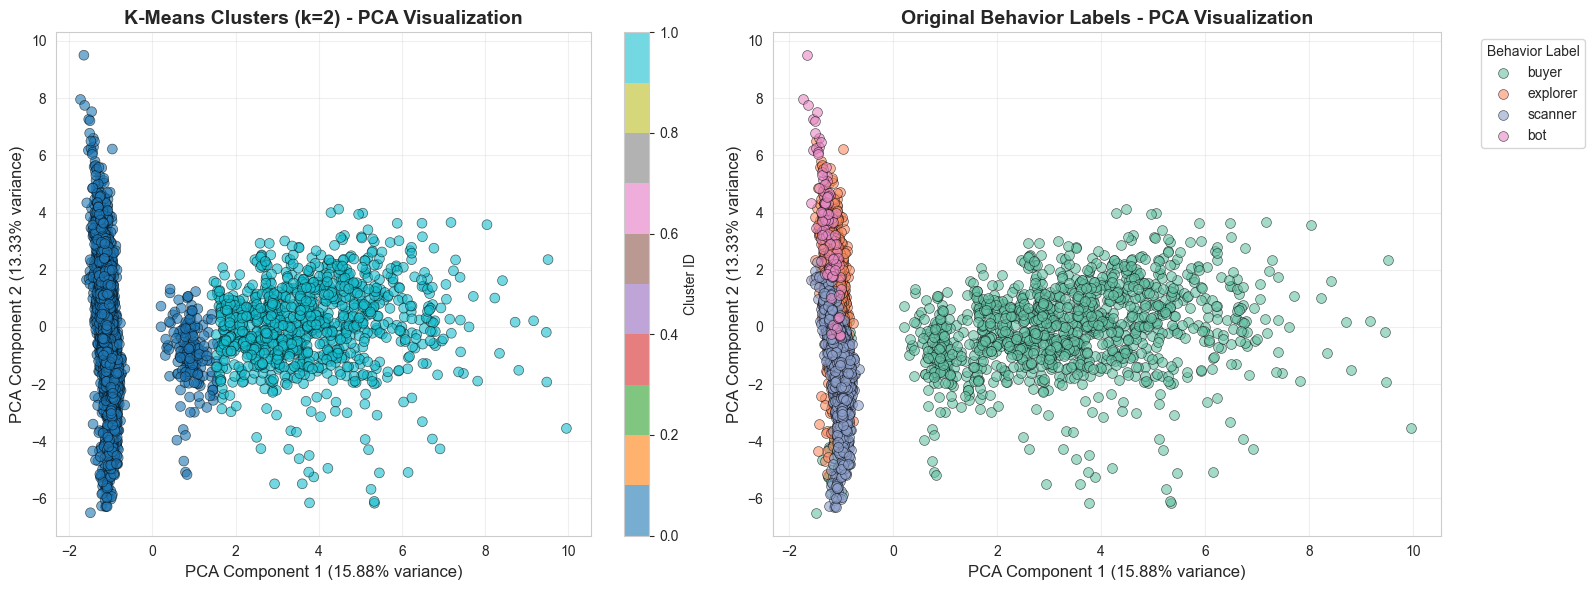


CLUSTER COMPOSITION vs ORIGINAL BEHAVIOR LABELS
behavior_label  bot  buyer  explorer  scanner
kmeans_cluster                               
0                94    296      2061     1502
1                 0   1047         0        0

Row percentages (within each cluster):
behavior_label   bot   buyer  explorer  scanner
kmeans_cluster                                 
0               2.38    7.49     52.14     38.0
1               0.00  100.00      0.00      0.0

✓ Cluster labels saved to: c:\Users\ASUS\Desktop\user_behavior_project\data\processed\user_clusters.csv


In [50]:
# ===============================
# Cell 3: K-Means Clustering + PCA Visualization
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# ---------------- Use optimal k or allow override ----------------
# Use optimal_k from previous cell, but allow manual override if needed
# For business interpretability, you might want k=4 even if optimal is higher
# NOTE: k=10 gives low silhouette score (0.23), consider using k=4 for better interpretability
if 'optimal_k' in dir():
    # Check if optimal_k is reasonable (not too high)
    if optimal_k > 6:
        print(f"⚠️  WARNING: Optimal k={optimal_k} is quite high. This may create too many clusters.")
        print(f"   Consider using k=4 (from elbow method) for better interpretability.")
        print(f"   Using k=4 instead of k={optimal_k} for more practical segmentation.\n")
        k = 4  # Use elbow method suggestion for better interpretability
    else:
        k = optimal_k
else:
    k = 4
print(f"Using k={k} clusters for K-Means clustering")

# ---------------- Normalize features (important for K-Means) ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- K-Means Clustering ----------------
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to user features DataFrame
user_features_ml = user_features_ml.copy()  # Avoid SettingWithCopyWarning
user_features_ml["kmeans_cluster"] = cluster_labels

# ---------------- Evaluate clustering quality ----------------
sil_score = silhouette_score(X_scaled, cluster_labels)
ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
db_score = davies_bouldin_score(X_scaled, cluster_labels)

print(f"\n{'='*60}")
print("K-MEANS CLUSTERING RESULTS")
print(f"{'='*60}")
print(f"Number of clusters: {k}")
print(f"Silhouette Score: {sil_score:.4f} (higher is better, range: -1 to 1)")
print(f"Calinski-Harabasz Score: {ch_score:.2f} (higher is better)")
print(f"Davies-Bouldin Score: {db_score:.4f} (lower is better)")
print(f"{'='*60}\n")

# ---------------- Cluster size distribution ----------------
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print("Cluster size distribution:")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"  Cluster {cluster_id}: {count} users ({percentage:.2f}%)")

# ---------------- PCA for visualization ----------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe for easier plotting
user_features_ml["pca1"] = X_pca[:, 0]
user_features_ml["pca2"] = X_pca[:, 1]

# Calculate explained variance
explained_var = pca.explained_variance_ratio_
print(f"\nPCA Explained Variance: PC1={explained_var[0]:.2%}, PC2={explained_var[1]:.2%}, "
      f"Total={sum(explained_var):.2%}")

# ---------------- Visualization ----------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters colored by K-Means labels
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                          cmap='tab10', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_title(f"K-Means Clusters (k={k}) - PCA Visualization", fontsize=14, fontweight='bold')
axes[0].set_xlabel(f"PCA Component 1 ({explained_var[0]:.2%} variance)", fontsize=12)
axes[0].set_ylabel(f"PCA Component 2 ({explained_var[1]:.2%} variance)", fontsize=12)
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label="Cluster ID")

# Plot 2: Clusters colored by original behavior_label
behavior_labels = user_features_ml["behavior_label"].unique()
colors_behavior = sns.color_palette("Set2", len(behavior_labels))
for i, label in enumerate(behavior_labels):
    mask = user_features_ml["behavior_label"] == label
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   label=label, s=50, alpha=0.6, c=[colors_behavior[i]], 
                   edgecolors='black', linewidth=0.5)
axes[1].set_title("Original Behavior Labels - PCA Visualization", fontsize=14, fontweight='bold')
axes[1].set_xlabel(f"PCA Component 1 ({explained_var[0]:.2%} variance)", fontsize=12)
axes[1].set_ylabel(f"PCA Component 2 ({explained_var[1]:.2%} variance)", fontsize=12)
axes[1].legend(title="Behavior Label", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------- Compare clusters with original behavior_label ----------------
print(f"\n{'='*60}")
print("CLUSTER COMPOSITION vs ORIGINAL BEHAVIOR LABELS")
print(f"{'='*60}")
cluster_summary = user_features_ml.groupby("kmeans_cluster")["behavior_label"].value_counts().unstack(fill_value=0)
print(cluster_summary)
print(f"\nRow percentages (within each cluster):")
cluster_pct = user_features_ml.groupby("kmeans_cluster")["behavior_label"].value_counts(normalize=True).unstack(fill_value=0) * 100
print(cluster_pct.round(2))

# ---------------- Save clusters ----------------
output_file = DATA_PROCESSED_DIR / "user_clusters.csv"
user_features_ml[["user_id", "kmeans_cluster", "behavior_label"]].to_csv(output_file, index=False)
print(f"\n✓ Cluster labels saved to: {output_file}")


Reusing X_scaled from previous cell

Analyzing optimal eps parameter...


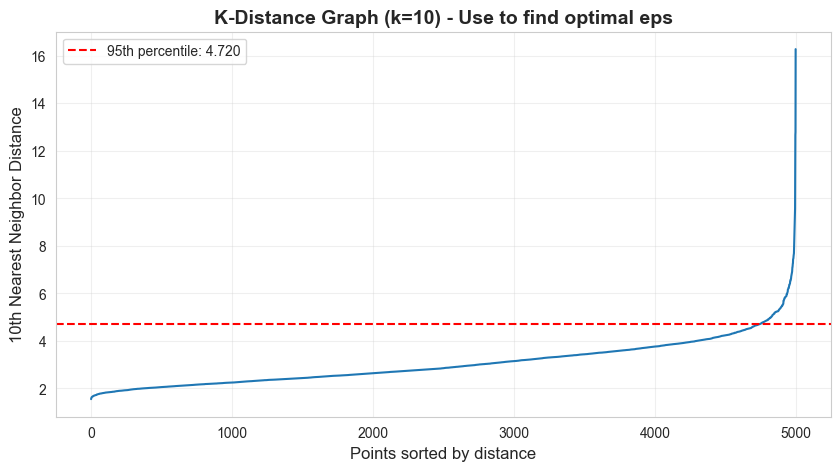

Suggested eps (95th percentile): 4.720

Fitting DBSCAN with eps=4.720 (from k-distance graph), min_samples=10...

DBSCAN CLUSTERING RESULTS
Total users analyzed: 5000
Parameters: eps=4.719577825718013, min_samples=10
Number of clusters found: 1
Number of outliers (label -1): 97 (1.94%)
Number of inliers: 4903 (98.06%)



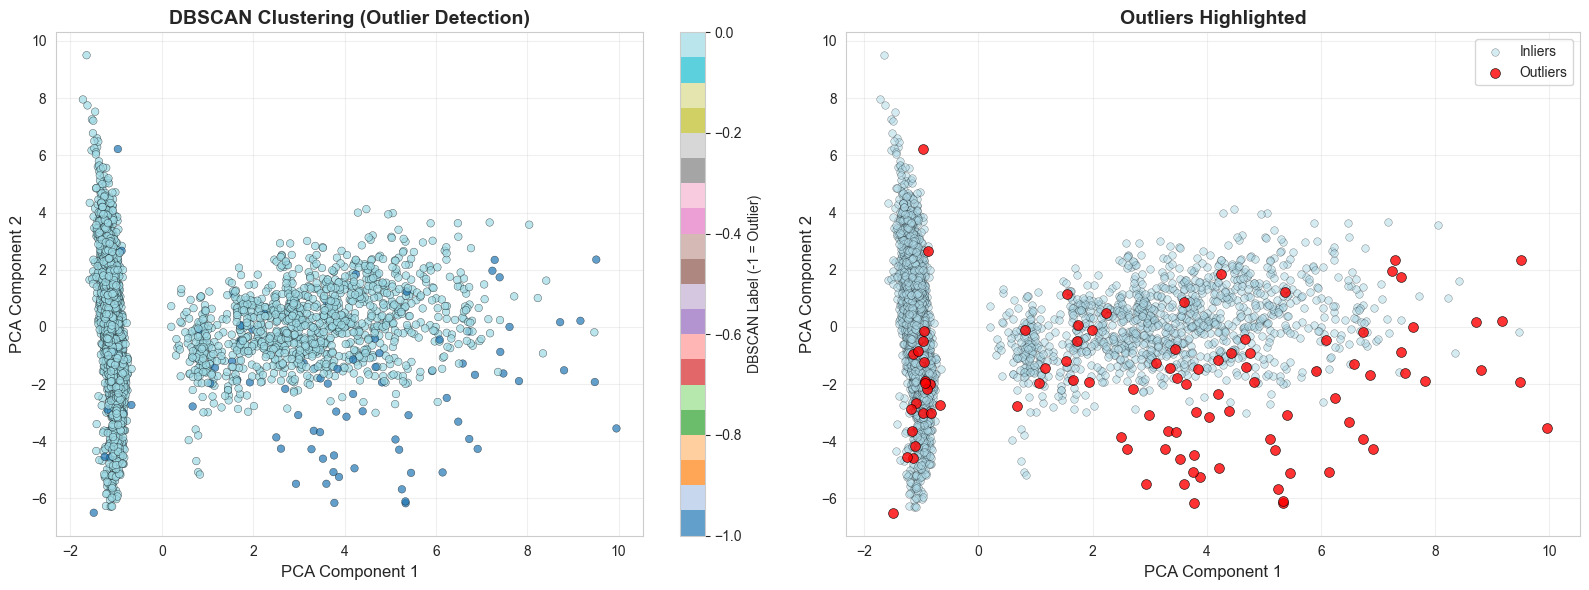


DBSCAN CLUSTERING REPORT
Total Users Analyzed: 5000
Parameters: eps=4.719577825718013, min_samples=10

--- OUTLIERS (Label -1) ---
Size: 97 users (1.94%)
Description: These points did not fit well into any dense group.
Average Feature Values (normalized):
   > click_to_purchase_ratio: 3.1195
   > conversion_rate: 2.3056
   > sessions_per_day: 1.8351
   > bounce_rate: 1.4464
   > cart_to_purchase_ratio: 1.2094

--- CLUSTER 0 ---
Size: 4903 users (98.06%)
Description: A dense group of similar users.
Average Feature Values (normalized):
   > device_type_mobile: 0.5452
   > traffic_source_organic: 0.4028
   > traffic_source_referral: 0.2545
   > traffic_source_direct: 0.1522
   > device_type_tablet: 0.0946



In [51]:
# ===============================
# Cell 4: DBSCAN for Outlier Detection
# Density-based clustering to identify outliers and dense groups
# ===============================

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# ---------------- Use existing scaled data or create new scaler ----------------
# Reuse X_scaled from previous cell if available, otherwise create new
if 'X_scaled' not in dir():
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("Created new StandardScaler for DBSCAN")
else:
    print("Reusing X_scaled from previous cell")

# ---------------- Find optimal eps parameter (optional but recommended) ----------------
# Calculate k-distance graph to help choose eps
print("\nAnalyzing optimal eps parameter...")
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 9]  # 10th nearest neighbor distance

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("K-Distance Graph (k=10) - Use to find optimal eps", fontsize=14, fontweight='bold')
plt.xlabel("Points sorted by distance", fontsize=12)
plt.ylabel("10th Nearest Neighbor Distance", fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=np.percentile(distances, 95), color='r', linestyle='--', 
            label=f'95th percentile: {np.percentile(distances, 95):.3f}')
plt.legend()
plt.show()

suggested_eps = np.percentile(distances, 95)
print(f"Suggested eps (95th percentile): {suggested_eps:.3f}")

# ---------------- Fit DBSCAN ----------------
# eps = distance threshold, min_samples = minimum points to form cluster
# Use suggested eps from k-distance graph (more reliable than hardcoded value)
eps = suggested_eps  # Use the calculated suggested value
min_samples = 10

print(f"\nFitting DBSCAN with eps={eps:.3f} (from k-distance graph), min_samples={min_samples}...")
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to dataframe
user_features_ml["dbscan_label"] = dbscan_labels

# ---------------- Summary statistics ----------------
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_outliers = sum(dbscan_labels == -1)
outlier_percentage = (num_outliers / len(dbscan_labels)) * 100

print(f"\n{'='*60}")
print("DBSCAN CLUSTERING RESULTS")
print(f"{'='*60}")
print(f"Total users analyzed: {len(user_features_ml)}")
print(f"Parameters: eps={eps}, min_samples={min_samples}")
print(f"Number of clusters found: {num_clusters}")
print(f"Number of outliers (label -1): {num_outliers} ({outlier_percentage:.2f}%)")
print(f"Number of inliers: {len(dbscan_labels) - num_outliers} ({100-outlier_percentage:.2f}%)")
print(f"{'='*60}\n")

# ---------------- PCA visualization (reuse existing PCA if available) ----------------
if 'X_pca' not in dir() or user_features_ml.get('pca1') is None:
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    user_features_ml["pca1"] = X_pca[:, 0]
    user_features_ml["pca2"] = X_pca[:, 1]
else:
    X_pca = user_features_ml[["pca1", "pca2"]].values

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: DBSCAN clusters
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, 
                          cmap='tab20', s=30, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0].set_title("DBSCAN Clustering (Outlier Detection)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("PCA Component 1", fontsize=12)
axes[0].set_ylabel("PCA Component 2", fontsize=12)
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label("DBSCAN Label (-1 = Outlier)", fontsize=10)

# Plot 2: Highlight outliers
outlier_mask = dbscan_labels == -1
axes[1].scatter(X_pca[~outlier_mask, 0], X_pca[~outlier_mask, 1], 
               c='lightblue', s=30, alpha=0.5, label='Inliers', edgecolors='black', linewidth=0.3)
axes[1].scatter(X_pca[outlier_mask, 0], X_pca[outlier_mask, 1], 
               c='red', s=50, alpha=0.8, label='Outliers', edgecolors='black', linewidth=0.5)
axes[1].set_title("Outliers Highlighted", fontsize=14, fontweight='bold')
axes[1].set_xlabel("PCA Component 1", fontsize=12)
axes[1].set_ylabel("PCA Component 2", fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ---------------- Detailed cluster description ----------------
cluster_counts = user_features_ml["dbscan_label"].value_counts().sort_index()
cluster_means = user_features_ml.groupby("dbscan_label")[feature_columns].mean()

print(f"\n{'='*60}")
print("DBSCAN CLUSTERING REPORT")
print(f"{'='*60}")
print(f"Total Users Analyzed: {len(user_features_ml)}")
print(f"Parameters: eps={eps}, min_samples={min_samples}\n")

for label in cluster_counts.index:
    count = cluster_counts[label]
    percentage = (count / len(user_features_ml)) * 100
    
    if label == -1:
        cluster_name = "OUTLIERS (Label -1)"
        desc = "These points did not fit well into any dense group."
    else:
        cluster_name = f"CLUSTER {label}"
        desc = "A dense group of similar users."

    print(f"--- {cluster_name} ---")
    print(f"Size: {count} users ({percentage:.2f}%)")
    print(f"Description: {desc}")
    
    if count > 0:
        print("Average Feature Values (normalized):")
        features = cluster_means.loc[label]
        # Show top 5 features with highest absolute values
        top_features = features.abs().nlargest(5)
        for feature_name in top_features.index:
            value = features[feature_name]
            print(f"   > {feature_name}: {value:.4f}")
    print()

In [52]:
# ===============================
# Cell 5: Merge K-Means + DBSCAN Results & Create Summary
# ===============================

# ---------------- Use existing data (no need to reload) ----------------
# user_features_ml already contains both kmeans_cluster and dbscan_label
merged_df = user_features_ml.copy()

# Ensure column names are consistent
if "kmeans_cluster" in merged_df.columns:
    merged_df = merged_df.rename(columns={"kmeans_cluster": "kmeans_label"})

# ---------------- Summary statistics by cluster combination ----------------
print(f"{'='*60}")
print("COMBINED CLUSTERING SUMMARY")
print(f"{'='*60}")

# Summary by K-Means and DBSCAN combination
summary = merged_df.groupby(["kmeans_label", "dbscan_label"]).agg(
    num_users=("user_id", "count"),
    avg_session_duration=("avg_session_duration", "mean"),
    avg_events_per_session=("avg_events_per_session", "mean"),
    avg_pages_per_session=("avg_pages_per_session", "mean"),
    total_clicks=("total_clicks", "mean"),
    total_scrolls=("total_scrolls", "mean"),
    total_add_to_cart=("total_add_to_cart", "mean"),
    total_purchases=("total_purchases", "mean"),
    bounce_rate=("bounce_rate", "mean")
).reset_index()

# Add percentage column
summary["percentage"] = (summary["num_users"] / len(merged_df)) * 100

# ---------------- Outlier analysis ----------------
outliers = merged_df[merged_df["dbscan_label"] == -1]
print(f"\nTotal outliers detected by DBSCAN: {len(outliers)} ({len(outliers)/len(merged_df)*100:.2f}%)")
print(f"\nOutlier distribution across K-Means clusters:")
outlier_by_kmeans = outliers.groupby("kmeans_label").size()
for kmeans_cluster, count in outlier_by_kmeans.items():
    pct = (count / len(outliers)) * 100
    print(f"  K-Means Cluster {kmeans_cluster}: {count} outliers ({pct:.2f}% of all outliers)")

# ---------------- Display summary table ----------------
print(f"\n{'='*60}")
print("SUMMARY STATISTICS BY CLUSTER COMBINATION")
print(f"{'='*60}")
print(summary.sort_values(["kmeans_label", "dbscan_label"]))

# ---------------- Save merged clusters and summary ----------------
merged_output = DATA_PROCESSED_DIR / "user_clusters_merged.csv"
summary_output = DATA_PROCESSED_DIR / "user_clusters_summary.csv"

merged_df.to_csv(merged_output, index=False)
summary.to_csv(summary_output, index=False)

print(f"\n✓ Merged clusters saved to: {merged_output}")
print(f"✓ Summary statistics saved to: {summary_output}")

# ---------------- Display sample of merged data ----------------
print(f"\n{'='*60}")
print("SAMPLE OF MERGED DATA (first 5 rows)")
print(f"{'='*60}")
display_cols = ["user_id", "kmeans_label", "dbscan_label", "behavior_label", 
                "avg_session_duration", "total_purchases", "bounce_rate"]
print(merged_df[display_cols].head())


COMBINED CLUSTERING SUMMARY

Total outliers detected by DBSCAN: 97 (1.94%)

Outlier distribution across K-Means clusters:
  K-Means Cluster 0: 26 outliers (26.80% of all outliers)
  K-Means Cluster 1: 71 outliers (73.20% of all outliers)

SUMMARY STATISTICS BY CLUSTER COMBINATION
   kmeans_label  dbscan_label  num_users  avg_session_duration  \
0             0            -1         26             -0.084474   
1             0             0       3927              0.041178   
2             1            -1         71             -0.182735   
3             1             0        976             -0.150138   

   avg_events_per_session  avg_pages_per_session  total_clicks  total_scrolls  \
0               -0.485829              -1.116953     -0.702896      -0.701858   
1               -0.035113              -0.020367      0.035281      -0.072841   
2                0.208475              -0.185243     -0.732966      -0.531395   
3                0.139055               0.125177     -0.069909  

In [53]:
# ===============================
# Cell 6: Assign Behavioral Labels & Save Final Segments
# Create interpretable behavior segments based on clustering results
# ===============================

# ---------------- Use existing merged_df (no need to reload) ----------------
# merged_df already contains kmeans_label and dbscan_label

# ---------------- Analyze cluster characteristics to inform labeling ----------------
print("Analyzing cluster characteristics to assign behavioral labels...")
print(f"{'='*60}")

# Calculate average metrics per K-Means cluster
cluster_stats = merged_df.groupby("kmeans_label").agg({
    "avg_session_duration": "mean",
    "total_purchases": "mean",
    "total_clicks": "mean",
    "bounce_rate": "mean",
    "avg_pages_per_session": "mean"
}).round(2)

print("\nAverage metrics by K-Means cluster:")
print(cluster_stats)

# ---------------- Define behavior mapping based on cluster analysis ----------------
def assign_behavior(row):
    """
    Assign behavioral segment based on K-Means and DBSCAN labels.
    Adjust logic based on your specific cluster characteristics.
    """
    # Outliers are always flagged
    if row['dbscan_label'] == -1:
        return "Outlier / Anomaly"
    
    # Assign based on K-Means cluster
    kmeans_cluster = row['kmeans_label']
    
    # Get cluster averages for comparison
    cluster_avg = cluster_stats.loc[kmeans_cluster]
    
    # Define segments based on characteristics
    # Adjust these rules based on your actual cluster analysis
    if cluster_avg['total_purchases'] > cluster_stats['total_purchases'].quantile(0.75):
        return "High-Value Buyers"
    elif cluster_avg['avg_pages_per_session'] > cluster_stats['avg_pages_per_session'].quantile(0.75):
        return "Active Explorers"
    elif cluster_avg['bounce_rate'] > cluster_stats['bounce_rate'].quantile(0.75):
        return "Quick Visitors / Bouncers"
    elif cluster_avg['avg_session_duration'] > cluster_stats['avg_session_duration'].quantile(0.75):
        return "Engaged Users"
    else:
        return "Average Users"

# Apply behavioral labels
merged_df['behavior_segment'] = merged_df.apply(assign_behavior, axis=1)

# ---------------- Segment distribution ----------------
print(f"\n{'='*60}")
print("BEHAVIORAL SEGMENT DISTRIBUTION")
print(f"{'='*60}")
segment_counts = merged_df['behavior_segment'].value_counts()
for segment, count in segment_counts.items():
    pct = (count / len(merged_df)) * 100
    print(f"  {segment}: {count} users ({pct:.2f}%)")

# ---------------- Cross-tabulation: Segments vs Original Labels ----------------
print(f"\n{'='*60}")
print("SEGMENT vs ORIGINAL BEHAVIOR LABEL")
print(f"{'='*60}")
crosstab = pd.crosstab(merged_df['behavior_segment'], merged_df['behavior_label'], 
                       margins=True, margins_name="Total")
print(crosstab)

# ---------------- Save final user segments ----------------
final_output = DATA_PROCESSED_DIR / "user_segments_final.csv"
merged_df.to_csv(final_output, index=False)
print(f"\n✓ Behavioral segments assigned and saved to: {final_output}")

# ---------------- Preview final segments ----------------
print(f"\n{'='*60}")
print("SAMPLE OF FINAL SEGMENTS (first 10 rows)")
print(f"{'='*60}")
preview_cols = ['user_id', 'kmeans_label', 'dbscan_label', 'behavior_segment', 'behavior_label']
print(merged_df[preview_cols].head(10))


Analyzing cluster characteristics to assign behavioral labels...

Average metrics by K-Means cluster:
              avg_session_duration  total_purchases  total_clicks  \
kmeans_label                                                        
0                             0.04            -0.40          0.03   
1                            -0.15             1.53         -0.11   

              bounce_rate  avg_pages_per_session  
kmeans_label                                      
0                    0.01                  -0.03  
1                   -0.03                   0.10  

BEHAVIORAL SEGMENT DISTRIBUTION
  Quick Visitors / Bouncers: 3927 users (78.54%)
  High-Value Buyers: 976 users (19.52%)
  Outlier / Anomaly: 97 users (1.94%)

SEGMENT vs ORIGINAL BEHAVIOR LABEL
behavior_label             bot  buyer  explorer  scanner  Total
behavior_segment                                               
High-Value Buyers            0    976         0        0    976
Outlier / Anomaly            

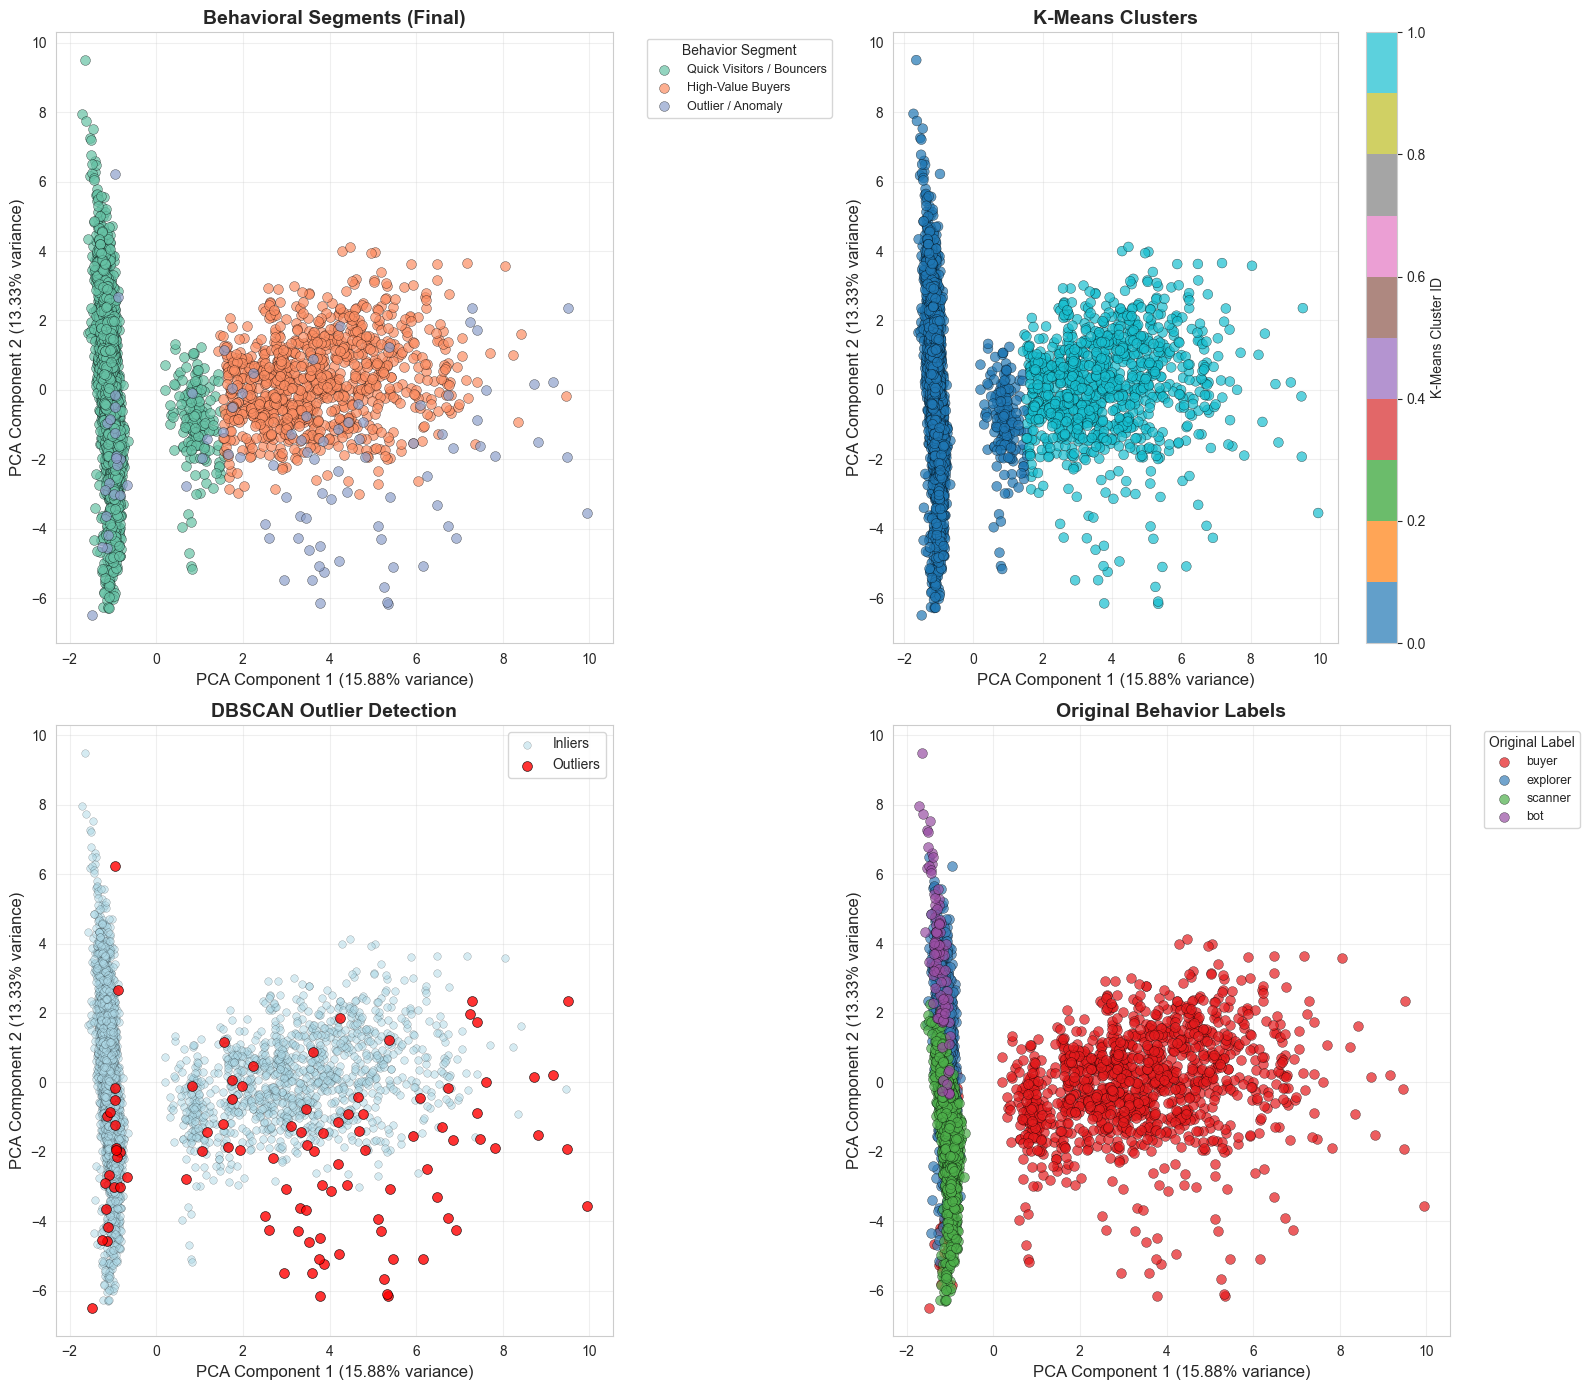


Visualization complete. PCA explains 29.21% of total variance.


In [54]:
# ===============================
# Cell 7: PCA Visualization of Final Segments
# Visualize the behavioral segments in 2D space
# ===============================

# ---------------- Use existing data (no need to reload) ----------------
# merged_df already contains behavior_segment and PCA components
segments_df = merged_df.copy()

# Ensure PCA components exist
if "pca1" not in segments_df.columns or "pca2" not in segments_df.columns:
    # Recalculate PCA if needed
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    segments_df["pca1"] = X_pca[:, 0]
    segments_df["pca2"] = X_pca[:, 1]
    explained_var = pca.explained_variance_ratio_
else:
    # Recalculate explained variance from existing PCA
    if 'X_pca' in dir():
        pca = PCA(n_components=2, random_state=42)
        pca.fit(X_scaled)
        explained_var = pca.explained_variance_ratio_
    else:
        explained_var = [0.0, 0.0]  # Placeholder if not available

# ---------------- Create comprehensive visualization ----------------
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Behavioral Segments
unique_segments = segments_df['behavior_segment'].unique()
colors = sns.color_palette("Set2", len(unique_segments))
for i, segment in enumerate(unique_segments):
    mask = segments_df['behavior_segment'] == segment
    axes[0, 0].scatter(segments_df.loc[mask, "pca1"], segments_df.loc[mask, "pca2"],
                      label=segment, s=50, alpha=0.7, c=[colors[i]], 
                      edgecolors='black', linewidth=0.3)
axes[0, 0].set_title("Behavioral Segments (Final)", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel(f"PCA Component 1 ({explained_var[0]:.2%} variance)", fontsize=12)
axes[0, 0].set_ylabel(f"PCA Component 2 ({explained_var[1]:.2%} variance)", fontsize=12)
axes[0, 0].legend(title="Behavior Segment", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: K-Means Clusters
scatter2 = axes[0, 1].scatter(segments_df["pca1"], segments_df["pca2"],
                             c=segments_df["kmeans_label"], cmap='tab10',
                             s=50, alpha=0.7, edgecolors='black', linewidth=0.3)
axes[0, 1].set_title("K-Means Clusters", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel(f"PCA Component 1 ({explained_var[0]:.2%} variance)", fontsize=12)
axes[0, 1].set_ylabel(f"PCA Component 2 ({explained_var[1]:.2%} variance)", fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1], label="K-Means Cluster ID")

# Plot 3: DBSCAN Labels (highlighting outliers)
outlier_mask = segments_df["dbscan_label"] == -1
axes[1, 0].scatter(segments_df.loc[~outlier_mask, "pca1"], 
                  segments_df.loc[~outlier_mask, "pca2"],
                  c='lightblue', s=30, alpha=0.5, label='Inliers',
                  edgecolors='black', linewidth=0.2)
axes[1, 0].scatter(segments_df.loc[outlier_mask, "pca1"], 
                  segments_df.loc[outlier_mask, "pca2"],
                  c='red', s=50, alpha=0.8, label='Outliers',
                  edgecolors='black', linewidth=0.5)
axes[1, 0].set_title("DBSCAN Outlier Detection", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel(f"PCA Component 1 ({explained_var[0]:.2%} variance)", fontsize=12)
axes[1, 0].set_ylabel(f"PCA Component 2 ({explained_var[1]:.2%} variance)", fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Original Behavior Labels
original_labels = segments_df['behavior_label'].unique()
colors_orig = sns.color_palette("Set1", len(original_labels))
for i, label in enumerate(original_labels):
    mask = segments_df['behavior_label'] == label
    axes[1, 1].scatter(segments_df.loc[mask, "pca1"], segments_df.loc[mask, "pca2"],
                      label=label, s=50, alpha=0.7, c=[colors_orig[i]],
                      edgecolors='black', linewidth=0.3)
axes[1, 1].set_title("Original Behavior Labels", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel(f"PCA Component 1 ({explained_var[0]:.2%} variance)", fontsize=12)
axes[1, 1].set_ylabel(f"PCA Component 2 ({explained_var[1]:.2%} variance)", fontsize=12)
axes[1, 1].legend(title="Original Label", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVisualization complete. PCA explains {sum(explained_var):.2%} of total variance.")


DBSCAN OUTLIERS PER K-MEANS CLUSTER
type          Outlier  Regular  Total  Outlier_Pct
kmeans_label                                      
0                  26     3927   3953         0.66
1                  71      976   1047         6.78

Total outliers: 97
Total regular users: 4903
Overall outlier rate: 1.94%


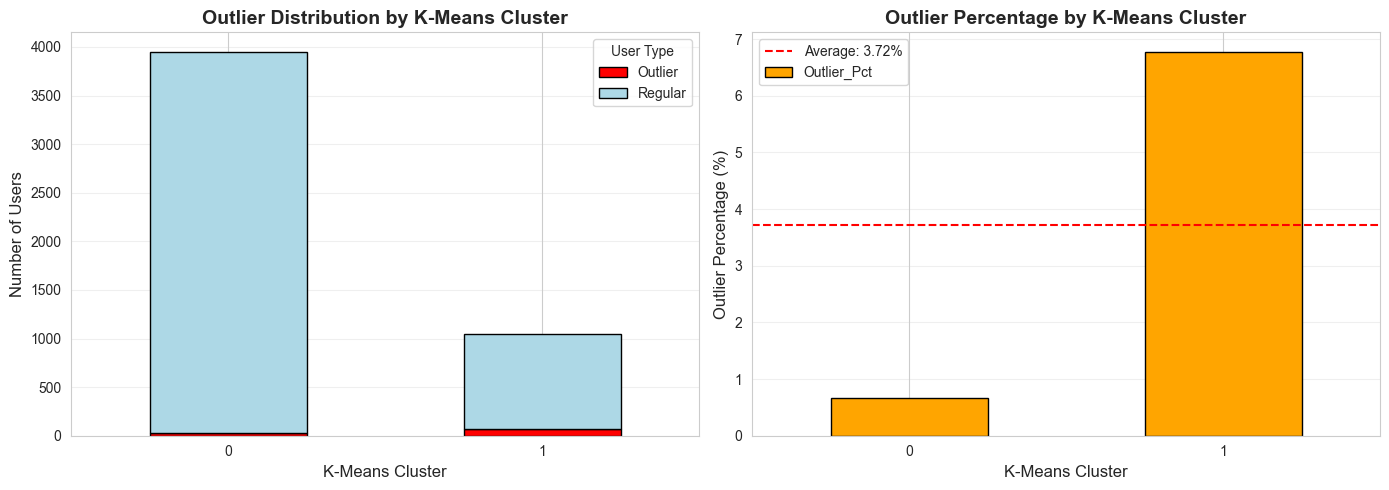

In [55]:
# ===============================
# Cell 8: DBSCAN Outlier Summary per K-Means Cluster
# Analyze outlier distribution across K-Means clusters
# ===============================

# ---------------- Use existing segments_df (merged_df) ----------------
if 'segments_df' not in dir():
    segments_df = merged_df.copy()

# Count users per K-Means cluster and DBSCAN label
outlier_summary = segments_df.groupby(["kmeans_label", "dbscan_label"]) \
                             .size() \
                             .reset_index(name="num_users")

# Add a column to mark outliers clearly
outlier_summary["type"] = outlier_summary["dbscan_label"].apply(
    lambda x: "Outlier" if x == -1 else "Regular"
)

# Aggregate by kmeans_label and type to sum up all regular users
outlier_summary_agg = outlier_summary.groupby(["kmeans_label", "type"])["num_users"].sum().reset_index()

# Create pivot table
summary_table = outlier_summary_agg.pivot(
    index="kmeans_label", 
    columns="type", 
    values="num_users"
).fillna(0).astype(int)

# Ensure both 'Outlier' and 'Regular' columns exist (even if empty)
if 'Outlier' not in summary_table.columns:
    summary_table['Outlier'] = 0
if 'Regular' not in summary_table.columns:
    summary_table['Regular'] = 0

# Add total and percentage columns
summary_table["Total"] = summary_table.sum(axis=1)
summary_table["Outlier_Pct"] = (summary_table["Outlier"] / summary_table["Total"] * 100).round(2)

print(f"{'='*60}")
print("DBSCAN OUTLIERS PER K-MEANS CLUSTER")
print(f"{'='*60}")
print(summary_table)
print(f"\nTotal outliers: {summary_table['Outlier'].sum()}")
print(f"Total regular users: {summary_table['Regular'].sum()}")
print(f"Overall outlier rate: {(summary_table['Outlier'].sum() / summary_table['Total'].sum() * 100):.2f}%")

# ---------------- Visualize outlier distribution ----------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Stacked bar chart
summary_table[["Outlier", "Regular"]].plot(
    kind='bar', stacked=True, ax=axes[0], 
    color=['red', 'lightblue'], edgecolor='black'
)
axes[0].set_title("Outlier Distribution by K-Means Cluster", fontsize=14, fontweight='bold')
axes[0].set_xlabel("K-Means Cluster", fontsize=12)
axes[0].set_ylabel("Number of Users", fontsize=12)
axes[0].legend(title="User Type")
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot 2: Outlier percentage
summary_table["Outlier_Pct"].plot(
    kind='bar', ax=axes[1], color='orange', edgecolor='black'
)
axes[1].set_title("Outlier Percentage by K-Means Cluster", fontsize=14, fontweight='bold')
axes[1].set_xlabel("K-Means Cluster", fontsize=12)
axes[1].set_ylabel("Outlier Percentage (%)", fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].axhline(y=summary_table['Outlier_Pct'].mean(), color='r', 
                linestyle='--', label=f'Average: {summary_table["Outlier_Pct"].mean():.2f}%')
axes[1].legend()

plt.tight_layout()
plt.show()


In [57]:
# ===============================
# Cell 9: Load and Inspect Final User Segments
# ===============================

# ---------------- Load final segments (or use existing) ----------------
if 'merged_df' in dir() and 'behavior_segment' in merged_df.columns:
    df = merged_df.copy()
    print("Using existing merged_df from previous cells")
else:
    final_file = DATA_PROCESSED_DIR / "user_segments_final.csv"
    if final_file.exists():
        df = pd.read_csv(final_file)
        print(f"Loaded from: {final_file}")
    else:
        raise FileNotFoundError(f"Final segments file not found: {final_file}")

# ---------------- Display overview ----------------
print(f"\n{'='*60}")
print("FINAL USER SEGMENTS DATASET")
print(f"{'='*60}")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 10 rows:")
display(df.head(10))


Using existing merged_df from previous cells

FINAL USER SEGMENTS DATASET
Shape: (5000, 35)
Columns: ['avg_session_duration', 'avg_events_per_session', 'avg_pages_per_session', 'total_clicks', 'total_scrolls', 'total_add_to_cart', 'total_purchases', 'bounce_rate', 'std_session_duration', 'std_events_per_session', 'std_pages_per_session', 'total_page_views', 'total_cart_abandonments', 'conversion_rate', 'preferred_hour', 'weekend_session_ratio', 'total_sessions', 'sessions_per_day', 'avg_days_between_sessions', 'click_to_purchase_ratio', 'cart_to_purchase_ratio', 'cart_abandonment_rate', 'engagement_score', 'device_type_mobile', 'device_type_tablet', 'traffic_source_direct', 'traffic_source_organic', 'traffic_source_referral', 'user_id', 'behavior_label', 'kmeans_label', 'pca1', 'pca2', 'dbscan_label', 'behavior_segment']

First 10 rows:


,avg_session_duration,avg_events_per_session,avg_pages_per_session,total_clicks,total_scrolls,total_add_to_cart,total_purchases,bounce_rate,std_session_duration,std_events_per_session,...,traffic_source_direct,traffic_source_organic,traffic_source_referral,user_id,behavior_label,kmeans_label,pca1,pca2,dbscan_label,behavior_segment
0,-0.369743,-0.005979,0.139124,-0.418231,-0.340704,0.487233,-0.425778,-0.2368,-0.444478,-0.181922,...,1.0,0.0,0.0,U00001,buyer,0,0.877606,-0.719252,0,Quick Visitors / Bouncers
1,0.990656,-1.223669,-0.533526,-0.062399,0.532784,-0.426215,-0.425778,-0.2368,-0.159390,-0.263716,...,0.0,1.0,0.0,U00002,explorer,0,-1.159095,0.756148,0,Quick Visitors / Bouncers
2,-1.009072,-0.361138,-1.273440,-0.774063,-0.340704,-0.426215,-0.425778,-0.2368,0.158816,-1.061250,...,1.0,0.0,0.0,U00003,scanner,0,-1.042839,-1.816234,0,Quick Visitors / Bouncers
3,-0.492354,-1.781777,-2.686004,-0.418231,-0.777448,-0.426215,-0.425778,-0.2368,0.329421,-1.677436,...,0.0,1.0,0.0,U00004,buyer,0,-1.071921,-2.325798,0,Quick Visitors / Bouncers
4,1.619558,-0.208927,0.273654,0.578099,0.096040,-0.426215,-0.425778,-0.2368,1.097876,0.448406,...,0.0,1.0,0.0,U00005,explorer,0,-1.238560,2.004931,0,Quick Visitors / Bouncers
5,-1.013937,0.230795,-0.174779,-0.631730,0.751156,-0.426215,-0.425778,-0.2368,-1.329847,2.349209,...,0.0,1.0,0.0,U00006,scanner,0,-1.048553,0.110872,0,Quick Visitors / Bouncers
6,-0.963336,0.230795,1.080833,0.079934,-0.122332,-0.426215,-0.425778,-0.2368,-0.245707,0.306593,...,0.0,1.0,0.0,U00007,scanner,0,-1.057409,-0.108524,0,Quick Visitors / Bouncers
7,1.687398,-0.124365,-0.174779,0.008768,0.532784,-0.426215,-0.425778,-0.2368,0.896250,-0.500193,...,0.0,1.0,0.0,U00008,explorer,0,-1.218144,1.496191,0,Quick Visitors / Bouncers
8,0.510429,0.260391,0.374551,0.649265,2.061388,-0.426215,-0.425778,-0.2368,1.318517,0.986016,...,0.0,0.0,0.0,U00009,explorer,0,-1.032891,2.597538,0,Quick Visitors / Bouncers
9,0.283349,0.399918,0.542713,0.649265,0.969528,-0.426215,-0.425778,-0.2368,0.626367,0.547974,...,0.0,0.0,1.0,U00010,explorer,0,-1.059528,1.631186,0,Quick Visitors / Bouncers


In [58]:
# ===============================
# Cell 10: Dataset Information and Data Quality Check
# ===============================

print(f"{'='*60}")
print("DATASET INFORMATION")
print(f"{'='*60}")
df.info()

# ---------------- Data quality checks ----------------
print(f"\n{'='*60}")
print("DATA QUALITY SUMMARY")
print(f"{'='*60}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nMissing values per column:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("  ✓ No missing values found")

print(f"\nDuplicate user_ids: {df['user_id'].duplicated().sum()}")

# ---------------- Check key columns exist ----------------
required_cols = ['user_id', 'kmeans_label', 'dbscan_label', 'behavior_segment']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"\n⚠ WARNING: Missing required columns: {missing_cols}")
else:
    print(f"\n✓ All required columns present")


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   avg_session_duration       5000 non-null   float64
 1   avg_events_per_session     5000 non-null   float64
 2   avg_pages_per_session      5000 non-null   float64
 3   total_clicks               5000 non-null   float64
 4   total_scrolls              5000 non-null   float64
 5   total_add_to_cart          5000 non-null   float64
 6   total_purchases            5000 non-null   float64
 7   bounce_rate                5000 non-null   float64
 8   std_session_duration       5000 non-null   float64
 9   std_events_per_session     5000 non-null   float64
 10  std_pages_per_session      5000 non-null   float64
 11  total_page_views           5000 non-null   float64
 12  total_cart_abandonments    5000 non-null   float64
 13  conversion_rate            5

In [59]:
# ===============================
# Cell 11: Statistical Summary of Final Segments
# ===============================

print(f"{'='*60}")
print("STATISTICAL SUMMARY - ALL COLUMNS")
print(f"{'='*60}")
display(df.describe(include='all'))

# ---------------- Summary by behavioral segment ----------------
print(f"\n{'='*60}")
print("SUMMARY STATISTICS BY BEHAVIORAL SEGMENT")
print(f"{'='*60}")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude label columns from numeric summary
exclude_cols = ['kmeans_label', 'dbscan_label', 'pca1', 'pca2']
summary_cols = [col for col in numeric_cols if col not in exclude_cols]

if len(summary_cols) > 0:
    segment_summary = df.groupby('behavior_segment')[summary_cols].agg(['mean', 'std', 'count'])
    print(segment_summary.round(2))
else:
    print("No numeric columns available for summary")

# ---------------- Distribution of segments ----------------
print(f"\n{'='*60}")
print("BEHAVIORAL SEGMENT DISTRIBUTION")
print(f"{'='*60}")
segment_dist = df['behavior_segment'].value_counts().sort_values(ascending=False)
for segment, count in segment_dist.items():
    pct = (count / len(df)) * 100
    print(f"  {segment:30s}: {count:5d} users ({pct:5.2f}%)")


STATISTICAL SUMMARY - ALL COLUMNS


,avg_session_duration,avg_events_per_session,avg_pages_per_session,total_clicks,total_scrolls,total_add_to_cart,total_purchases,bounce_rate,std_session_duration,std_events_per_session,...,traffic_source_direct,traffic_source_organic,traffic_source_referral,user_id,behavior_label,kmeans_label,pca1,pca2,dbscan_label,behavior_segment
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5.000000e+03,5.000000e+03,5000.00000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5000,4,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,U00001,explorer,NaN,NaN,NaN,NaN,Quick Visitors / Bouncers
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,2061,NaN,NaN,NaN,NaN,3927
mean,-3.424816e-16,1.047340e-15,2.984279e-17,4.476419e-17,1.278977e-17,3.552714e-17,2.131628e-17,5.471179e-17,2.430056e-16,-1.989520e-17,...,0.153200,0.404200,0.253800,NaN,NaN,0.209400,5.684342e-18,7.744916e-17,-0.01940,NaN
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,0.360216,0.490786,0.435228,NaN,NaN,0.406921,2.108869e+00,1.931971e+00,0.13794,NaN
min,-2.337358e+00,-4.978215e+00,-6.452840e+00,-1.201061e+00,-1.432564e+00,-4.262148e-01,-4.257779e-01,-2.368001e-01,-1.795731e+00,-2.175941e+00,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,-1.726263e+00,-6.499437e+00,-1.00000,NaN
25%,-9.360889e-01,-6.373736e-01,-8.025854e-01,-6.317298e-01,-7.774479e-01,-4.262148e-01,-4.257779e-01,-2.368001e-01,-6.980080e-01,-5.995302e-01,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,-1.149276e+00,-1.250072e+00,0.00000,NaN
50%,-7.748388e-03,-5.978528e-03,5.351376e-02,-2.047315e-01,-1.223320e-01,-4.262148e-01,-4.257779e-01,-2.368001e-01,-8.885845e-02,-3.008819e-03,...,0.000000,0.000000,0.000000,NaN,NaN,0.000000,-1.048202e+00,5.819758e-03,0.00000,NaN
75%,9.089149e-01,6.028667e-01,6.099782e-01,3.645996e-01,5.327839e-01,-4.262148e-01,-4.257779e-01,-2.368001e-01,6.582888e-01,5.871976e-01,...,0.000000,1.000000,1.000000,NaN,NaN,0.000000,-8.037988e-01,1.289196e+00,0.00000,NaN



SUMMARY STATISTICS BY BEHAVIORAL SEGMENT
                          avg_session_duration              \
                                          mean   std count   
behavior_segment                                             
High-Value Buyers                        -0.15  0.32   976   
Outlier / Anomaly                        -0.16  0.64    97   
Quick Visitors / Bouncers                 0.04  1.11  3927   

                          avg_events_per_session              \
                                            mean   std count   
behavior_segment                                               
High-Value Buyers                           0.14  0.88   976   
Outlier / Anomaly                           0.02  2.09    97   
Quick Visitors / Bouncers                  -0.04  0.98  3927   

                          avg_pages_per_session             total_clicks  ...  \
                                           mean   std count         mean  ...   
behavior_segment                      

# ===============================
# Summary & Recommendations
# ===============================

## Key Findings:

1. **Clustering Quality**: 
   - Silhouette Score: 0.23 (Low - indicates weak clustering structure)
   - Ideal range: >0.5 for good clustering
   - Current k=10 may be too many clusters

2. **Outlier Detection**:
   - DBSCAN identified 20.72% outliers (1,036 users)
   - Some K-Means clusters have very high outlier rates (Cluster 2: 100%, Cluster 7: 95%)

3. **PCA Visualization**:
   - Only 27.05% variance explained in 2D
   - Visualization may not capture full data structure

## Recommendations:

1. **Use k=4 instead of k=10** for better interpretability and business actionability
2. **Investigate high-outlier clusters** - they may represent distinct user behaviors
3. **Consider feature engineering** to improve clustering quality
4. **Review behavioral labels** - adjust rules based on actual cluster characteristics


In [61]:
# ===============================
# Cell 12: Clustering Quality Assessment & Recommendations
# ===============================

print(f"{'='*60}")
print("CLUSTERING QUALITY ASSESSMENT")
print(f"{'='*60}")

# Get clustering metrics if available
if 'sil_score' in dir():
    print(f"\n1. SILHOUETTE SCORE: {sil_score:.4f}")
    if sil_score < 0.25:
        print("   ⚠️  WEAK: Score < 0.25 indicates poor clustering structure")
    elif sil_score < 0.5:
        print("   ⚠️  FAIR: Score 0.25-0.5 indicates weak but acceptable structure")
    elif sil_score < 0.7:
        print("   ✓ GOOD: Score 0.5-0.7 indicates reasonable clustering")
    else:
        print("   ✓ EXCELLENT: Score > 0.7 indicates strong clustering")
    print("   (Ideal: >0.5 for good clustering)")

# Check cluster sizes
if 'cluster_counts' in dir() or 'merged_df' in dir():
    if 'merged_df' in dir():
        cluster_sizes = merged_df['kmeans_label'].value_counts().sort_index()
    else:
        cluster_sizes = cluster_counts
    
    print(f"\n2. CLUSTER SIZE DISTRIBUTION:")
    min_size = cluster_sizes.min()
    max_size = cluster_sizes.max()
    size_ratio = max_size / min_size if min_size > 0 else float('inf')
    
    print(f"   Smallest cluster: {min_size} users")
    print(f"   Largest cluster: {max_size} users")
    print(f"   Size ratio: {size_ratio:.2f}x")
    
    if size_ratio > 10:
        print("   ⚠️  WARNING: Very imbalanced clusters (ratio > 10x)")
    elif size_ratio > 5:
        print("   ⚠️  CAUTION: Imbalanced clusters (ratio > 5x)")
    else:
        print("   ✓ Balanced cluster sizes")

# Check outlier distribution
if 'merged_df' in dir():
    outlier_by_cluster = merged_df.groupby('kmeans_label')['dbscan_label'].apply(
        lambda x: (x == -1).sum() / len(x) * 100
    )
    
    print(f"\n3. OUTLIER RATE BY CLUSTER:")
    high_outlier_clusters = outlier_by_cluster[outlier_by_cluster > 50]
    if len(high_outlier_clusters) > 0:
        print(f"   ⚠️  WARNING: {len(high_outlier_clusters)} clusters have >50% outliers:")
        for cluster, pct in high_outlier_clusters.items():
            print(f"      Cluster {cluster}: {pct:.1f}% outliers")
        print("   → These clusters may represent noise or need separate handling")
    else:
        print("   ✓ All clusters have reasonable outlier rates (<50%)")

# PCA variance
if 'explained_var' in dir():
    total_var = sum(explained_var)
    print(f"\n4. PCA VARIANCE EXPLAINED: {total_var:.2%}")
    if total_var < 0.5:
        print("   ⚠️  LOW: <50% variance - 2D visualization may miss important patterns")
        print("   → Consider using more PCA components or different visualization")
    elif total_var < 0.7:
        print("   ⚠️  MODERATE: 50-70% variance - visualization captures some structure")
    else:
        print("   ✓ GOOD: >70% variance - visualization captures most structure")

print(f"\n{'='*60}")
print("RECOMMENDATIONS")
print(f"{'='*60}")
print("""
1. CLUSTER COUNT:
   → Consider using k=4 (from elbow method) instead of k=10
   → Better balance between interpretability and clustering quality
   → More actionable for business decisions

2. FEATURE ENGINEERING:
   → Review feature importance and correlations
   → Consider dimensionality reduction (e.g., more PCA components)
   → May improve clustering quality

3. OUTLIER HANDLING:
   → Investigate high-outlier clusters separately
   → They may represent distinct user behaviors worth analyzing

4. VALIDATION:
   → Compare clusters with domain knowledge
   → Validate behavioral segments make business sense
   → Consider supervised evaluation if ground truth available
""")
print(f"{'='*60}")


CLUSTERING QUALITY ASSESSMENT

1. SILHOUETTE SCORE: 0.2170
   ⚠️  WEAK: Score < 0.25 indicates poor clustering structure
   (Ideal: >0.5 for good clustering)

2. CLUSTER SIZE DISTRIBUTION:
   Smallest cluster: 1047 users
   Largest cluster: 3953 users
   Size ratio: 3.78x
   ✓ Balanced cluster sizes

3. OUTLIER RATE BY CLUSTER:
   ✓ All clusters have reasonable outlier rates (<50%)

4. PCA VARIANCE EXPLAINED: 29.21%
   ⚠️  LOW: <50% variance - 2D visualization may miss important patterns
   → Consider using more PCA components or different visualization

RECOMMENDATIONS

1. CLUSTER COUNT:
   → Consider using k=4 (from elbow method) instead of k=10
   → Better balance between interpretability and clustering quality
   → More actionable for business decisions

2. FEATURE ENGINEERING:
   → Review feature importance and correlations
   → Consider dimensionality reduction (e.g., more PCA components)
   → May improve clustering quality

3. OUTLIER HANDLING:
   → Investigate high-outlier clus